In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Dataset
df1=pd.read_csv('./mtcars.csv')
df1.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
#Drop model Column and Key Statisitcs
df1 = df1.drop('model',axis=1)
df1.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


mpg


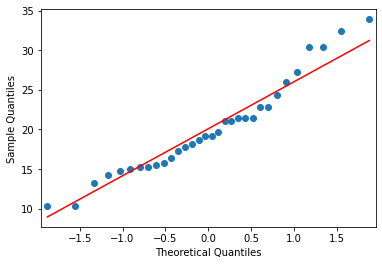

cyl


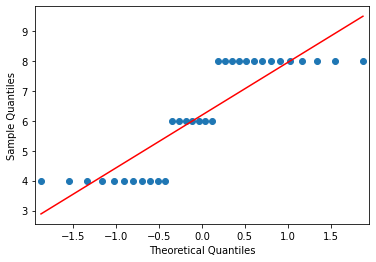

disp


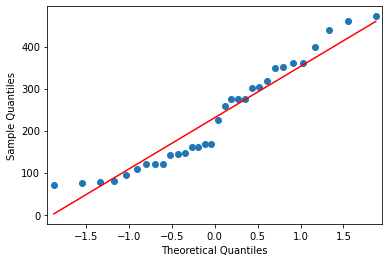

hp


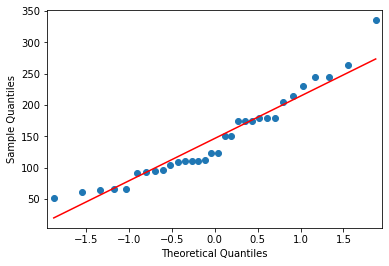

drat


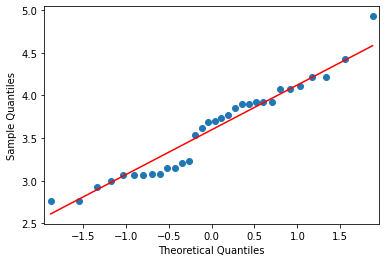

wt


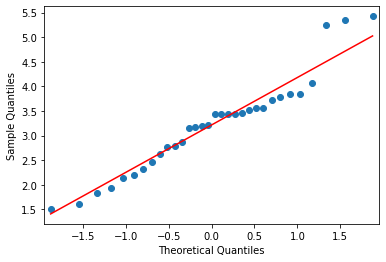

qsec


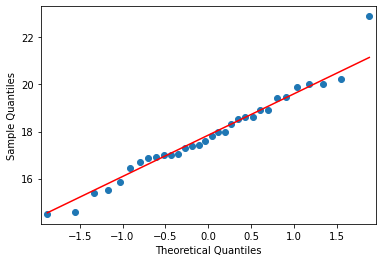

vs


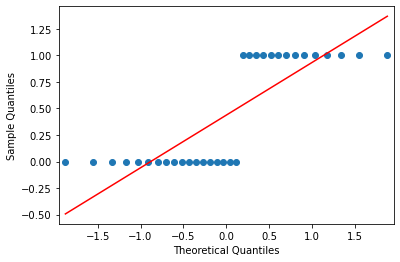

am


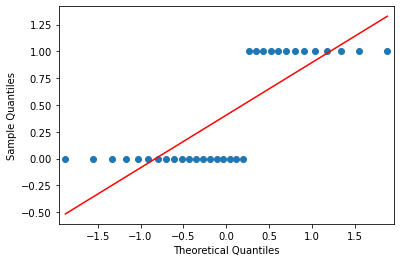

gear


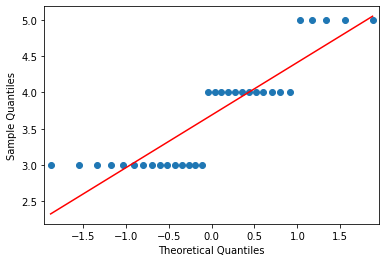

carb


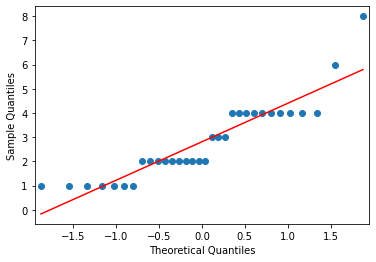

In [4]:
#Create QQ Plots

from statsmodels.graphics.gofplots import qqplot
import pylab

cnt = 1
for col in df1.columns:
    print(col)
    qqplot(df1[col],line='s')
    pylab.show()
    cnt += 1    

In [5]:
#Normality test - Shapiro-Wilk Test

#   p <= alpha(0.05): reject H0, not normal.
#   p > alpha(0.05): fail to reject H0, normal.

from scipy.stats import shapiro

cnt = 1
for col in df1.columns:
    print(col)
    stat, p = shapiro(df1['mpg'])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05  
    if p > alpha:
     print('Sample looks Gaussian (fail to reject H0)')
    else:
     print('Sample does not look Gaussian (reject H0)')
    cnt += 1    

mpg
Statistics=0.948, p=0.123
Sample looks Gaussian (fail to reject H0)
cyl
Statistics=0.948, p=0.123
Sample looks Gaussian (fail to reject H0)
disp
Statistics=0.948, p=0.123
Sample looks Gaussian (fail to reject H0)
hp
Statistics=0.948, p=0.123
Sample looks Gaussian (fail to reject H0)
drat
Statistics=0.948, p=0.123
Sample looks Gaussian (fail to reject H0)
wt
Statistics=0.948, p=0.123
Sample looks Gaussian (fail to reject H0)
qsec
Statistics=0.948, p=0.123
Sample looks Gaussian (fail to reject H0)
vs
Statistics=0.948, p=0.123
Sample looks Gaussian (fail to reject H0)
am
Statistics=0.948, p=0.123
Sample looks Gaussian (fail to reject H0)
gear
Statistics=0.948, p=0.123
Sample looks Gaussian (fail to reject H0)
carb
Statistics=0.948, p=0.123
Sample looks Gaussian (fail to reject H0)


In [6]:
#VIF Factors
from statsmodels.stats.outliers_influence import variance_inflation_factor

df2 = df1._get_numeric_data() #This line will drop non-numeric cols
x = df2.drop('mpg',axis=1)

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['features'] = x.columns
vif.sort_values('VIF Factor')

,VIF Factor,features
7,7.412020,am
6,8.752581,vs
9,32.213836,carb
2,56.047781,hp
1,98.930791,disp
0,112.629828,cyl
8,119.804879,gear
3,132.214353,drat
4,182.948049,wt
5,317.534376,qsec


In [7]:
#Create Standard Model

#Define x and y variable
x = df1.drop('mpg',axis=1).to_numpy()
y = df1['mpg'].to_numpy()

#Create Train and Test Column
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

#Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [8]:
#Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline

pipeline =[]

pipe_lm = Pipeline([('scl', StandardScaler()),
                    ('clf', LinearRegression())])
pipeline.insert(0,pipe_lm)

pipe_lasso= Pipeline([('scl', StandardScaler()),
                     ('clf', Lasso(random_state=100))])
pipeline.insert(1,pipe_lasso)

pipe_ridge= Pipeline([('scl', StandardScaler()),
                     ('clf', Ridge(random_state=100))])
pipeline.insert(2,pipe_ridge)

pipe_elas= Pipeline([('scl', StandardScaler()),
                     ('clf', ElasticNet(random_state=100))])
pipeline.insert(3,pipe_elas)

# Set grid search params 

modelpara =[]

param_gridlm = {}
modelpara.insert(0,param_gridlm)

param_gridlasso = {'clf__alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1e-1, 1, 5, 10, 20],
                  'clf__tol':[1e-1, 1, 5, 10, 20, 50, 100]}
modelpara.insert(1,param_gridlasso)

param_gridridge = {'clf__alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1e-1, 1, 5, 10, 20],
                  'clf__tol':[1e-1, 1, 5, 10, 20, 50, 100]}
modelpara.insert(2,param_gridridge)

param_gridelas = {'clf__alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1e-1, 1, 5, 10, 20],
                 'clf__tol':[1e-1, 1, 5, 10, 20, 50, 100]}
modelpara.insert(3,param_gridelas)

In [9]:
#Create Learning Curves

from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train, 
                                                            y=y_train,
                                                            train_sizes=np.linspace(.1,1,10),
                                                            scoring = 'neg_root_mean_squared_error',
                                                            cv=10,random_state=100)
    
    train_mean = np.sqrt(np.mean(-train_scores, axis=1))
    train_std = np.sqrt(np.std(-train_scores, axis=1))
    test_mean = np.sqrt(np.mean(-test_scores, axis=1))
    test_std = np.sqrt(np.std(-test_scores, axis=1))
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('RMSE')
    plt.legend(loc='best')
    plt.ylim([-1,10])
    plt.show()

Learning Curve - LM


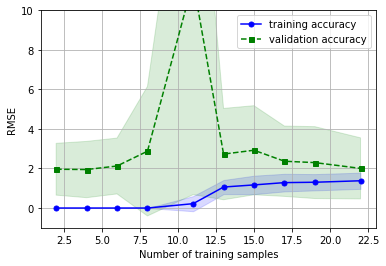

Learning Curve - Lasso


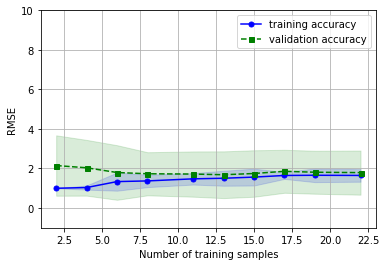

Learning Curve - Ridge


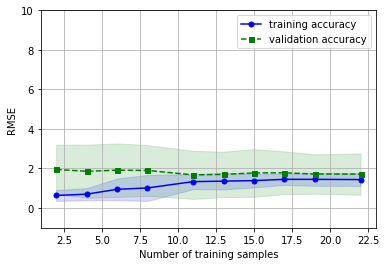

Learning Curve - ElasticNet


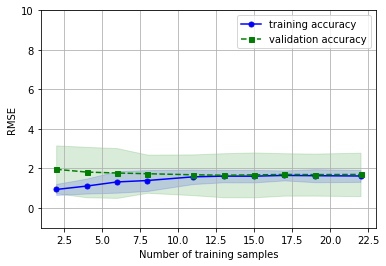

In [10]:
#Plot Learning Curve

print('Learning Curve - LM')
plot_learning_curves(pipe_lm)
print('Learning Curve - Lasso')
plot_learning_curves(pipe_lasso)
print('Learning Curve - Ridge')
plot_learning_curves(pipe_ridge)
print('Learning Curve - ElasticNet')
plot_learning_curves(pipe_elas)

Model Evaluation - RMSE Score
LinearRegression 1.98
Lasso 1.73
Ridge 1.74
ElasticNet 1.68




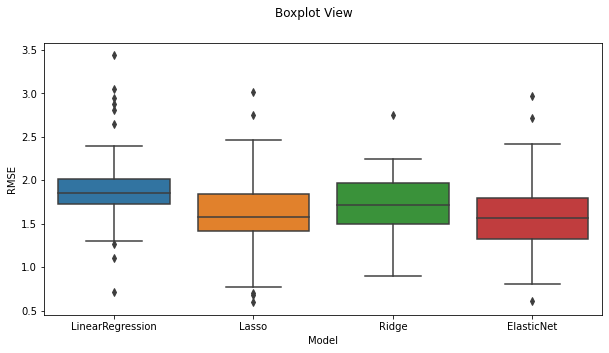

In [11]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('LinearRegression',pipe_lm))
models.append(('Lasso',pipe_lasso))
models.append(('Ridge',pipe_ridge))
models.append(('ElasticNet',pipe_elas))
  
#Model Evaluation
results =[]
names=[]
scoring ='neg_root_mean_squared_error'
print('Model Evaluation - RMSE Score')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x_train,y_train,cv=rkf,scoring=scoring)
    results.append(np.sqrt(-cv_results))
    names.append(name)
    print('{} {:.2f}'.format(name,np.sqrt(-cv_results.mean())))
print('\n')

#Boxplot View
fig = plt.figure(figsize=(10,5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.show()

In [12]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn import metrics

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, cv=cv2,scoring='neg_root_mean_squared_error')
    gs_clf = gs_clf.fit(x_train, y_train)
    model = gs_clf.best_estimator_
    
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test)

    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
   
    #Output Heading
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
        
    #Output Validation Statistics
    print('\nBest Parameters:',bestpara)
    
    #Test data accuracy of model with best params    
    print('\nIntercept: {:.2f}'.format(float(gs_clf.best_estimator_.named_steps['clf'].intercept_)))
    coeff_table=pd.DataFrame(np.transpose(gs_clf.best_estimator_.named_steps['clf'].coef_),
                             df1.drop('mpg',axis=1).columns,
                              columns=['Coefficients'])
    print('\n')
    print(coeff_table)
    
    #Print R2
    print('\nR2: {:0.2f}'.format(metrics.r2_score(y_test,y_pred)))
    adjusted_r_squared2 = 1-(1-metrics.r2_score(y_test,y_pred))*(len(y)-1)/(len(y)-x.shape[1]-1)
    print('Adj_R2: {:0.2f}'.format(adjusted_r_squared2))

    #Print MSE and RMSE
    print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))  
    print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))  
    print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))) 

In [13]:
#Run Models
for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)


Optimized Model

Model Name: LinearRegression()

Best Parameters: {}

Intercept: 19.87


      Coefficients
cyl       1.938951
disp      1.080770
hp       -0.310827
drat      1.321747
wt       -2.459684
qsec      1.461972
vs       -0.067494
am        0.888064
gear      2.599937
carb     -3.069300

R2: 0.30
Adj_R2: -0.04
Mean Absolute Error: 2.54
Mean Squared Error: 18.47
Root Mean Squared Error: 4.30

Optimized Model

Model Name: Lasso(random_state=100)

Best Parameters: {'clf__alpha': 1, 'clf__tol': 0.1}

Intercept: 19.87


      Coefficients
cyl      -1.336581
disp     -0.668298
hp       -0.715811
drat      0.000000
wt       -2.130608
qsec      0.000000
vs        0.000000
am        0.075656
gear      0.000000
carb     -0.000000

R2: 0.86
Adj_R2: 0.80
Mean Absolute Error: 1.73
Mean Squared Error: 3.61
Root Mean Squared Error: 1.90

Optimized Model

Model Name: Ridge(random_state=100)

Best Parameters: {'clf__alpha': 10, 'clf__tol': 0.1}

Intercept: 19.87


      Coefficients
cyl     